In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data file downloaded 02-27-18
# This will be the file used, data is from 11/1/15 to 2/20/18

# Assign filename
data_022718 = 'crime-datacrime-datacrimestat.csv'

# Read file in DataFrame
crime = pd.read_csv(data_022718, sep=',', low_memory=False, dtype={'ZIP': object})

# Quick view of the data
print(crime.head())
print(crime.info())

# Rename columns
crime.columns = ['incident_num', 'date_occurred_on', 'date_occurred_to', 'crime_cat', '100_block_addr', 'zip', 'premise_type']


        INC NUMBER        OCCURRED ON        OCCURRED TO   UCR CRIME CATEGORY  \
0  201600000052855  11/01/2015  00:00  01/09/2016  00:00  MOTOR VEHICLE THEFT   
1  201600000594484  11/01/2015  00:00                NaN                 RAPE   
2  201500002102327  11/01/2015  00:00  11/01/2015  09:00        LARCENY-THEFT   
3  201500002101405  11/01/2015  00:00  11/01/2015  05:00  MOTOR VEHICLE THEFT   
4  201500002102668  11/01/2015  00:00  11/01/2015  11:50  MOTOR VEHICLE THEFT   

             100 BLOCK ADDR    ZIP         PREMISE TYPE  
0  N 43RD AVE & W CACTUS RD  85029  SINGLE FAMILY HOUSE  
1         13XX E ALMERIA RD  85006  SINGLE FAMILY HOUSE  
2            51XX N 15TH ST  85014            APARTMENT  
3       102XX W MEDLOCK AVE  85307  SINGLE FAMILY HOUSE  
4            69XX W WOOD ST  85043  SINGLE FAMILY HOUSE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148468 entries, 0 to 148467
Data columns (total 7 columns):
INC NUMBER            148468 non-null object
OCCURRED O

In [2]:
# 4 variables have missing data: Occurred On, Occurred To, Zip, Premise Type
print(crime[['date_occurred_on', 'date_occurred_to', 'zip', 'premise_type']].isna().sum())
# 'date_occurred_to' field is blank because the victim knows the exact time the incident occurred and only the 'date_occurred_on' is populated

# Sum number of incidents where occurred_on and occurred_to are NaN
print(crime[(crime.date_occurred_on.isna()) & (crime.date_occurred_to.isna())])

# 
print(crime.loc[crime['zip'].isna()])
print(crime.loc[crime['date_occurred_on'].isna()].head())
print(crime.loc[crime['date_occurred_to'].isna()].head())
print(crime.loc[crime['premise_type'].isna()].head())

date_occurred_on      336
date_occurred_to    43719
zip                     3
premise_type          805
dtype: int64
Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
          incident_num   date_occurred_on   date_occurred_to      crime_cat  \
63037  201700001136425  11/04/2016  00:00  06/25/2017  00:00           RAPE   
79708  201700000206086  02/04/2017  10:00  02/04/2017  10:14  LARCENY-THEFT   
82276  201700000368400  02/18/2017  12:00  02/27/2017  15:23  LARCENY-THEFT   

             100_block_addr  zip             premise_type  
63037       451XX W RHEA RD  NaN                APARTMENT  
79708     XX W BASELINE AVE  NaN          SPECIALTY STORE  
82276  122XX N TABLE TOP RD  NaN  FENCED RESIDENTIAL YARD  
         incident_num date_occurred_on   date_occurred_to      crime_cat  \
248   201500002110561              NaN  11/02/2015  14:40        ROBBERY   
275   201500002132194              NaN  11

In [3]:
# Identify the unique values
print(crime[['crime_cat', 'zip', 'premise_type']].nunique())
print(crime.crime_cat.unique())
print(crime.zip.unique())
#print(crime.premise_type.unique())

crime_cat        9
zip             99
premise_type    94
dtype: int64
['MOTOR VEHICLE THEFT' 'RAPE' 'LARCENY-THEFT' 'DRUG OFFENSE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']
['85029' '85006' '85014' '85307' '85043' '85017' '85085' '85019' '85031'
 '85027' '85024' '85339' '85028' '85018' '85015' '85008' '85254' '85051'
 '85023' '85009' '85044' '85035' '85041' '85003' '85048' '85353' '85016'
 '85022' '85033' '85040' '85007' '85050' '85004' '85054' '85032' '85013'
 '85034' '85042' '85021' '85012' '85053' '85308' '85086' '85020' '85037'
 '85331' '85306' '85083' '85310' '85045' '85087' '85301' '85253' '85304'
 '85255' '85251' '85258' '85225' '85363' '85282' '85268' '85213' '85395'
 '85202' '85201' '85381' '85281' '85210' '85323' '85224' '85345' '85302'
 '85266' '85382' '85392' '85303' '85260' '85286' '85296' '85203' '85248'
 '85295' '85290' '85326' '85234' '85283' '85215' '85226' '85257' '85305'
 nan '85383' '85204' '85337' '85396' '85338' '

In [4]:
# Cleaning the data set

# Remove missing zip code rows and convert to str
crime_clean = crime.drop(crime.index[[63037, 79708, 82276]])
print(crime_clean.loc[crime_clean['zip'].isna()])

# Fill in missing date values with date_occurred_on or date_occurred_to
crime_clean.date_occurred_on.fillna(crime_clean.date_occurred_to, inplace=True)
print(crime_clean.iloc[248])
crime_clean.date_occurred_to.fillna(crime_clean.date_occurred_on, inplace=True)
print(crime_clean.iloc[24])
print(crime_clean[['date_occurred_on', 'date_occurred_to']].isna().sum())

# Premise type NaN convert to Unknown
crime_clean.premise_type = crime_clean.premise_type.fillna('UNKNOWN')


Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
incident_num                            201500002110561
date_occurred_on                      11/02/2015  14:40
date_occurred_to                      11/02/2015  14:40
crime_cat                                       ROBBERY
100_block_addr                       41XX W BASELINE RD
zip                                               85041
premise_type        STREET / ROADWAY / ALLEY / SIDEWALK
Name: 248, dtype: object
incident_num                   201500002100158
date_occurred_on             11/01/2015  00:05
date_occurred_to             11/01/2015  00:05
crime_cat                  MOTOR VEHICLE THEFT
100_block_addr             28XX W CAMELBACK RD
zip                                      85017
premise_type        CONVENIENCE MARKET / STORE
Name: 24, dtype: object
date_occurred_on    0
date_occurred_to    0
dtype: int64


In [5]:
# Convert date columns to datetime
crime_clean['date_occurred_on'] = pd.to_datetime(crime_clean['date_occurred_on'], format='%m/%d/%Y %H:%M')
crime_clean['date_occurred_to'] = pd.to_datetime(crime_clean['date_occurred_to'], format='%m/%d/%Y %H:%M')
#crime_clean.info()

# Break down datetime columns into seperate columns, new columns listed below
# date_occ_on ==> [occ_on_month, occ_on_day, occ_on_year, occ_on_hr, occ_on_min]
crime_clean['occ_on_month'] = crime_clean['date_occurred_on'].dt.month
crime_clean['occ_on_day'] = crime_clean['date_occurred_on'].dt.day
crime_clean['occ_on_year'] = crime_clean['date_occurred_on'].dt.year
crime_clean['occ_on_dayofweek'] = crime_clean['date_occurred_on'].dt.weekday_name
crime_clean['occ_on_time'] = crime_clean['date_occurred_on'].dt.time
crime_clean['occ_on_hr'] = crime_clean['date_occurred_on'].dt.hour
crime_clean['occ_on_min'] = crime_clean['date_occurred_on'].dt.minute

# date_occ_to ==> [occ_to_month, occ_to_day, occ_to_year, occ_to_hr, occ_to_min]
crime_clean['occ_to_month'] = crime_clean['date_occurred_to'].dt.month
crime_clean['occ_to_day'] = crime_clean['date_occurred_to'].dt.day
crime_clean['occ_to_year'] = crime_clean['date_occurred_to'].dt.year
crime_clean['occ_to_dayofweek'] = crime_clean['date_occurred_to'].dt.weekday_name
crime_clean['occ_to_time'] = crime_clean['date_occurred_to'].dt.time
crime_clean['occ_to_hr'] = crime_clean['date_occurred_to'].dt.hour
crime_clean['occ_to_min'] = crime_clean['date_occurred_to'].dt.minute

crime_clean.head()
crime_clean.info()

# clean file is called crime_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148465 entries, 0 to 148467
Data columns (total 21 columns):
incident_num        148465 non-null object
date_occurred_on    148465 non-null datetime64[ns]
date_occurred_to    148465 non-null datetime64[ns]
crime_cat           148465 non-null object
100_block_addr      148465 non-null object
zip                 148465 non-null object
premise_type        148465 non-null object
occ_on_month        148465 non-null int64
occ_on_day          148465 non-null int64
occ_on_year         148465 non-null int64
occ_on_dayofweek    148465 non-null object
occ_on_time         148465 non-null object
occ_on_hr           148465 non-null int64
occ_on_min          148465 non-null int64
occ_to_month        148465 non-null int64
occ_to_day          148465 non-null int64
occ_to_year         148465 non-null int64
occ_to_dayofweek    148465 non-null object
occ_to_time         148465 non-null object
occ_to_hr           148465 non-null int64
occ_to_min          14

# Exploratory Data Analysis

occ_on_month      1       2       3       4       5       6       7       8   \
occ_on_year                                                                    
2015             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016          5303.0  4756.0  5124.0  5288.0  5270.0  5283.0  5170.0  5471.0   
2017          5550.0  5029.0  5408.0  5338.0  5675.0  5524.0  5678.0  5693.0   
2018          5712.0  3406.0     NaN     NaN     NaN     NaN     NaN     NaN   

occ_on_month      9       10      11      12  
occ_on_year                                   
2015             NaN     NaN  4866.0  5295.0  
2016          5287.0  5372.0  5302.0  5716.0  
2017          5329.0  5789.0  5375.0  5456.0  
2018             NaN     NaN     NaN     NaN  


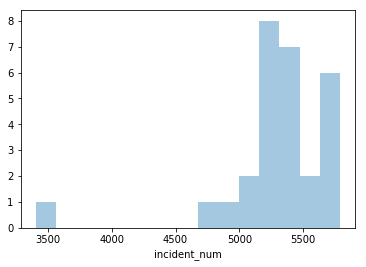

In [72]:
# Number of incidents per month by year
inc_mon_yr = crime_clean.groupby(['occ_on_year', 'occ_on_month'])['incident_num'].count()
print(inc_mon_yr.unstack())
sns.distplot(inc_mon_yr, kde=False)

In [91]:
# Number of types of crime per month by year
crime_month = crime_clean.groupby(['occ_on_year','occ_on_month', 'crime_cat'])['crime_cat'].count()
crime_month.unstack()

crime_cat                 AGGRAVATED ASSAULT  ARSON  BURGLARY  DRUG OFFENSE  \
occ_on_year occ_on_month                                                      
2015        11                           288     19       933           313   
            12                           297     15      1085           304   
2016        1                            293     14       963           378   
            2                            291      8       835           372   
            3                            375     18       847           441   
            4                            317     10      1033           363   
            5                            339     21       988           371   
            6                            349     33      1003           349   
            7                            363     31       916           325   
            8                            362     24      1024           433   
            9                            361     26       967           452   
            10                           324     28       974           396   
            11                           388     29       970           403   
            12                           363     33      1005           412   
2017        1                            349     31      1006           432   
            2                            367     11       944           392   
            3                            433     31       930           427   
            4                            458     32       965           392   
            5                            473     34      1005           433   
            6                            415     39       955           404   
            7                            425     26       938           421   
            8                            481     30       985           398   
            9                            453     40       897           408   
            10                           493     29       961           385   
            11                           445     40       881           401   
            12                           403     56       869           375   
2018        1                            399     61       891           492   
            2                            348     18       517           317   

crime_cat                 LARCENY-THEFT  MOTOR VEHICLE THEFT  \
occ_on_year occ_on_month                                       
2015        11                     2437                  622   
            12                     2775                  537   
2016        1                      2776                  563   
            2                      2479                  502   
            3                      2607                  546   
            4                      2640                  616   
            5                      2663                  574   
            6                      2626                  626   
            7                      2577                  624   
            8                      2663                  643   
            9                      2532                  654   
            10                     2714                  632   
            11                     2675                  566   
            12                     2936                  683   
2017        1                      2819                  592   
            2                      2513                  506   
            3                      2742                  521   
            4                      2587                  553   
            5                      2815                  555   
            6                      2754                  598   
            7                      2865                  622   
            8                      2848                  600   
            9                      2649                  546   
            10               

occ_on_dayofweek
Friday       22600
Wednesday    21864
Tuesday      21774
Thursday     21615
Monday       21217
Saturday     20468
Sunday       18927
Name: incident_num, dtype: int64


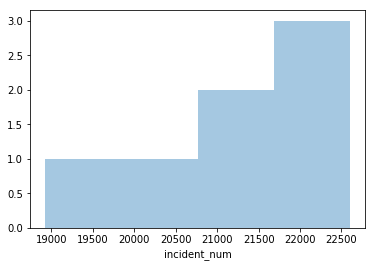

In [92]:
# Day of the week crimes take place
crime_dayofweek = crime_clean.groupby('occ_on_dayofweek')['incident_num'].count().sort_values(ascending=False)
print(crime_dayofweek)
sns.distplot(crime_dayofweek, kde=False)

In [65]:
# Time of Day crimes occur
crime_timeofday = crime_clean.groupby('occ_on_time')['incident_num'].count().sort_values(ascending=False)
print(crime_timeofday[:10])

occ_on_time
00:00:00    5399
12:00:00    4138
22:00:00    3853
20:00:00    3557
17:00:00    3526
18:00:00    3511
21:00:00    3468
19:00:00    3036
08:00:00    2777
16:00:00    2756
Name: incident_num, dtype: int64


In [83]:
# Market Basket Analysis

# Import mlxtend packages
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules


In [88]:
# Create basket list
basket = crime_clean[['crime_cat', 'zip', 'premise_type', '100_block_addr', 'occ_on_month', 'occ_on_day', 'occ_on_year', 'occ_on_time', 'occ_on_dayofweek']].values.tolist()


In [89]:
# one-hot encode the data and frequent items
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_encode = pd.DataFrame(te_ary, columns=te.columns_)
basket_encode.head()

TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
frequent_itemsets = apriori(basket_encode, min_support=0.025, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.048631,[85008]
1,0.042192,[85009]
2,0.052800,[85015]
3,0.028977,[85016]
4,0.040454,[85017]
5,0.032823,[85021]
6,0.027016,[85022]
7,0.030054,[85023]
8,0.030856,[85029]
9,0.032452,[85032]


In [15]:
# Confidence Metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.025)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LARCENY-THEFT),(85015),0.504382,0.052800,0.027784,0.055086,1.043288,0.001153,1.002419
1,(85015),(LARCENY-THEFT),0.052800,0.504382,0.027784,0.526215,1.043288,0.001153,1.046083
2,(APARTMENT),(BURGLARY),0.113246,0.177059,0.029408,0.259680,1.466633,0.009357,1.111602
3,(BURGLARY),(APARTMENT),0.177059,0.113246,0.029408,0.166090,1.466633,0.009357,1.063369
4,(APARTMENT),(LARCENY-THEFT),0.113246,0.504382,0.041586,0.367216,0.728052,-0.015533,0.783235
5,(LARCENY-THEFT),(APARTMENT),0.504382,0.113246,0.041586,0.082449,0.728052,-0.015533,0.966436
6,(SINGLE FAMILY HOUSE),(BURGLARY),0.188671,0.177059,0.092864,0.492199,2.779868,0.059458,1.620600
7,(BURGLARY),(SINGLE FAMILY HOUSE),0.177059,0.188671,0.092864,0.524480,2.779868,0.059458,1.706193
8,(LARCENY-THEFT),(DEPARTMENT / DISCOUNT STORE),0.504382,0.029785,0.027023,0.053577,1.798801,0.012000,1.025139
9,(DEPARTMENT / DISCOUNT STORE),(LARCENY-THEFT),0.029785,0.504382,0.027023,0.907282,1.798801,0.012000,5.345427


In [16]:
# Lift Metric
rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules_1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(APARTMENT),(BURGLARY),0.113246,0.177059,0.029408,0.259680,1.466633,0.009357,1.111602
1,(BURGLARY),(APARTMENT),0.177059,0.113246,0.029408,0.166090,1.466633,0.009357,1.063369
2,(SINGLE FAMILY HOUSE),(BURGLARY),0.188671,0.177059,0.092864,0.492199,2.779868,0.059458,1.620600
3,(BURGLARY),(SINGLE FAMILY HOUSE),0.177059,0.188671,0.092864,0.524480,2.779868,0.059458,1.706193
4,(LARCENY-THEFT),(DEPARTMENT / DISCOUNT STORE),0.504382,0.029785,0.027023,0.053577,1.798801,0.012000,1.025139
5,(DEPARTMENT / DISCOUNT STORE),(LARCENY-THEFT),0.029785,0.504382,0.027023,0.907282,1.798801,0.012000,5.345427
6,(LARCENY-THEFT),(DRIVEWAY),0.504382,0.035039,0.026525,0.052589,1.500881,0.008852,1.018524
7,(DRIVEWAY),(LARCENY-THEFT),0.035039,0.504382,0.026525,0.757017,1.500881,0.008852,2.039721
8,(GROCERY / SUPER MARKET),(LARCENY-THEFT),0.027508,0.504382,0.025050,0.910627,1.805433,0.011175,5.545496
9,(LARCENY-THEFT),(GROCERY / SUPER MARKET),0.504382,0.027508,0.025050,0.049664,1.805433,0.011175,1.023314
